In [ ]:
## Topic
## data from https://ride.citibikenyc.com/system-data
## 先根据lcoation聚类，然后分析trajectory,

/var/folders/ty/cy038g3n0b76wc7182ktv28r0000gn/T/ipykernel_11044/1329555048.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/202409-citibike-tripdata/202409-citibike-tripdata_1.csv')


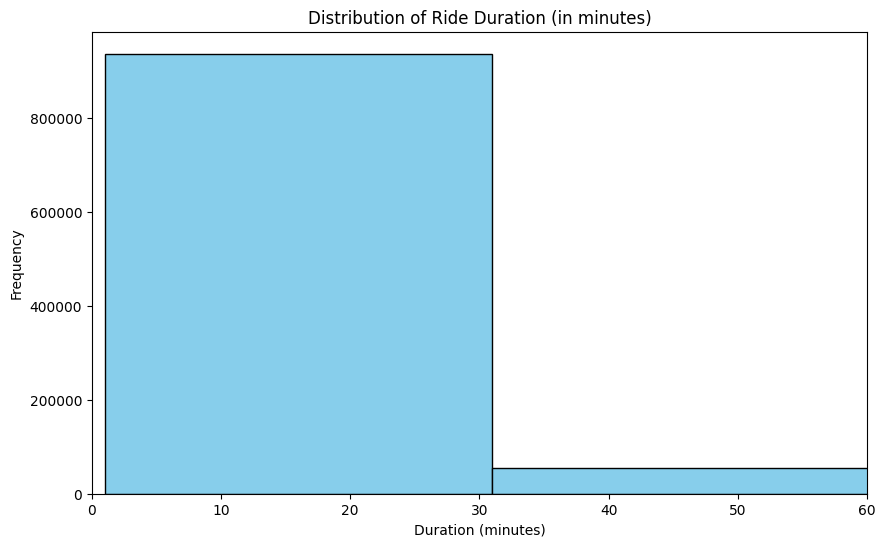

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('./data/202409-citibike-tripdata/202409-citibike-tripdata_1.csv')

# Convert time format
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

# Calculate ride duration
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

# Plot distribution of ride durations
plt.figure(figsize=(10, 6))
plt.hist(data['ride_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ride Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # Limit to within 60 minutes
plt.show()

/var/folders/ty/cy038g3n0b76wc7182ktv28r0000gn/T/ipykernel_11044/2825106834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rideable_type', palette='viridis')


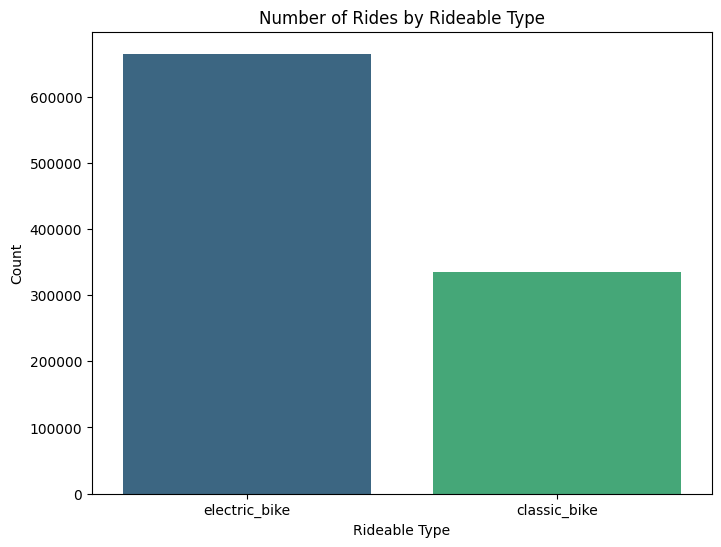

In [7]:
import seaborn as sns

# Plot a bar chart of rideable types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='rideable_type', palette='viridis')
plt.title('Number of Rides by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.show()


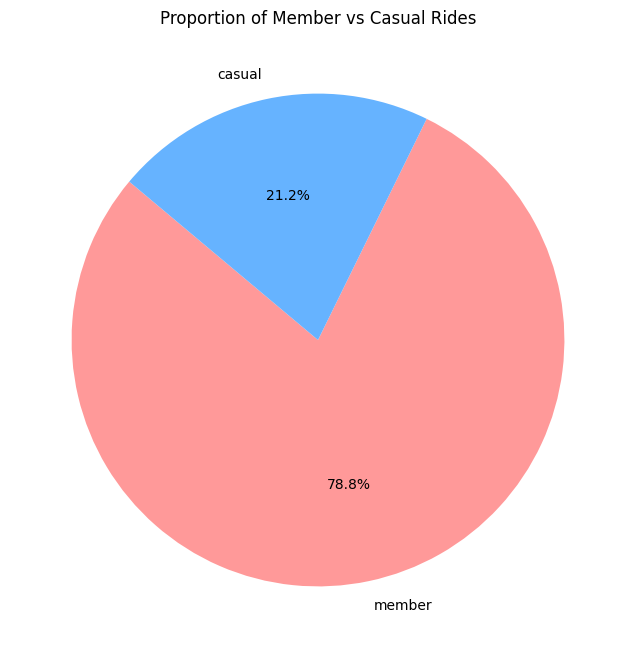

In [8]:
# Plot a pie chart for members vs casual riders
member_counts = data['member_casual'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(member_counts, labels=member_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Member vs Casual Rides')
plt.show()


/var/folders/ty/cy038g3n0b76wc7182ktv28r0000gn/T/ipykernel_11044/913301488.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=start_station_counts.index, x=start_station_counts.values, palette='coolwarm')


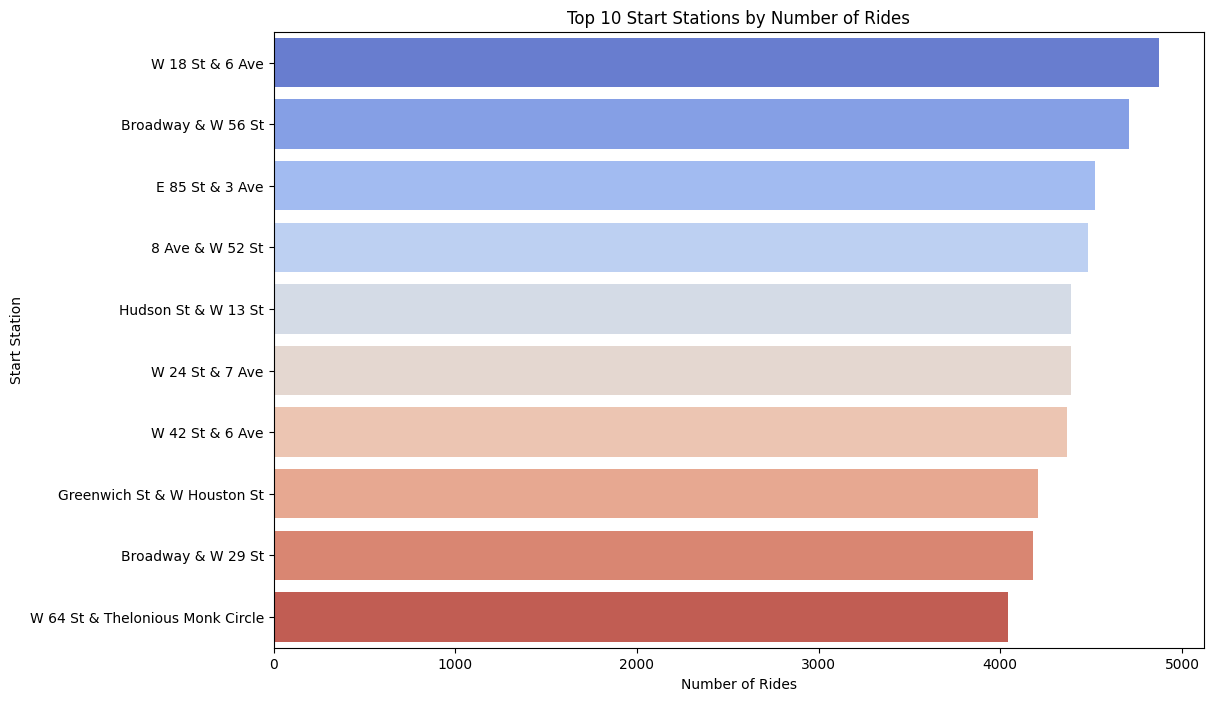

In [9]:
# Calculate the number of rides for each start station
start_station_counts = data['start_station_name'].value_counts().head(10)

# Plot a bar chart of the top start stations
plt.figure(figsize=(12, 8))
sns.barplot(y=start_station_counts.index, x=start_station_counts.values, palette='coolwarm')
plt.title('Top 10 Start Stations by Number of Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station')
plt.show()


In [10]:
import folium

# Extract unique start stations with their coordinates
stations = data[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Create a map centered around the average location of the stations
m = folium.Map(location=[stations['start_lat'].mean(), stations['start_lng'].mean()], zoom_start=13)

# Add station markers to the map
for _, row in stations.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=row['start_station_name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map to an HTML file
m.save('map/stations_map.html')
